In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr


In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [110]:
train_df = pd.read_feather("/kaggle/input/amexfeather/train_data.ftr")
train_df = train_df.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [111]:
gc.collect()

3139

In [112]:
train_df.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,NaN,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,NaN,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,NaN,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,NaN,...,NaN,NaN,0.002705,0.006184,0.001899,NaN,0.008186,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,NaN,...,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008156,0.006943,0.000905,0


In [113]:
train_df.info(max_cols=191,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 190 columns):
 #    Column  Non-Null Count   Dtype         
---   ------  --------------   -----         
 0    S_2     458913 non-null  datetime64[ns]
 1    P_2     455944 non-null  float16       
 2    D_39    458913 non-null  float16       
 3    B_1     458913 non-null  float16       
 4    B_2     458882 non-null  float16       
 5    R_1     458913 non-null  float16       
 6    S_3     373943 non-null  float16       
 7    D_41    458882 non-null  float16       
 8    B_3     458882 non-null  float16       
 9    D_42    59910 non-null   float16       
 10   D_43    324591 non-null  float16       
 11   D_44    436618 non-null  float16       
 12   B_4     458913 non-null  float16       
 13   D_45    458882 non-null  float16       
 14   B_5     458913 non-null  float

**CHECKING THE NULL VALUES DETAILS IN A DATASET**

In [114]:
missing_value_counts = train_df.isna().sum()
total_rows = train_df.shape[0]
missing_value_percentages = (missing_value_counts / total_rows) * 100
missing_values_df = pd.DataFrame({'Missing Values': missing_value_counts, 'Percentage': missing_value_percentages})
missing_values_df

,Missing Values,Percentage
S_2,0,0.000000
P_2,2969,0.646964
D_39,0,0.000000
B_1,0,0.000000
B_2,31,0.006755
...,...,...
D_142,378598,82.498861
D_143,2830,0.616675
D_144,0,0.000000
D_145,2830,0.616675


**CHECKING ALL THE COLUMNS WHICH HAVE MORE THAN 70% VALUES ARE NULL OR NaN**

In [115]:
filtered_missing_values_df = missing_values_df[missing_values_df['Percentage'] > 70]
sorted_missing_values_df = filtered_missing_values_df.sort_values(by='Percentage')
result = sorted_missing_values_df.reset_index()[['index', 'Percentage']]
result.columns = ['Column Name', 'Missing Value %']
print(result)

   Column Name  Missing Value %
0         D_53        71.022612
1         D_82        74.806118
2        D_142        82.498861
3         D_42        86.945238
4         D_66        88.542055
5         D_49        88.720520
6        D_132        88.721174
7        D_106        88.745579
8         R_26        88.855622
9         D_76        89.253737
10        B_29        94.045930
11         R_9        94.126773
12       D_137        96.427427
13       D_136        96.427427
14       D_138        96.427427
15       D_135        96.427427
16       D_134        96.427427
17        B_42        98.661620
18        D_73        99.076296
19        B_39        99.105495
20       D_111        99.198541
21       D_110        99.198541
22       D_108        99.427560
23        D_88        99.819792
24        D_87        99.859450


In [116]:
gc.collect()

0

**NOW REMOVING ALL THE COLUMNS WHERE MORE THAN ATLEAST 70% VALUES ARE MISSING**

In [117]:
columns_to_drop = result['Column Name'].tolist()
train_df.drop(columns=columns_to_drop, inplace=True)

In [118]:
train_df.shape

(458913, 165)

In [119]:
gc.collect()

0

**Checking Target Values distribution**

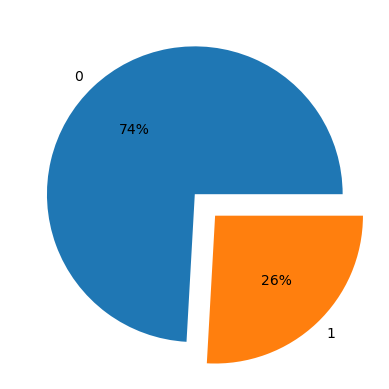

In [120]:
plt.pie(x=train_df["target"].value_counts(), labels=[0, 1], explode=[0, 0.2], autopct="%.0f%%")
plt.show()

**OBSERVATION ---> As per the above graphical representation means that 74% of the CardHolders are paying their bills on time and 26% of the CardHolders are not paying their bills on time .**

In [121]:
missing_value_counts = train_df.isnull().sum()
cols_with_missing_values = missing_value_counts[missing_value_counts > 0]
total_rows = train_df.shape[0]
percentages = (missing_value_counts / total_rows) * 100
sorted_missing_values = cols_with_missing_values.sort_values(ascending=False)
missing_values_df = pd.DataFrame({'Missing Values': sorted_missing_values, 'Percentage': percentages[sorted_missing_values.index]})
mean_missing_values = train_df.isnull().mean()
missing_values_df['Mean Value'] = mean_missing_values[sorted_missing_values.index]
with pd.option_context('display.max_rows', None):
    print(missing_values_df)
gc.collect()

       Missing Values  Percentage  Mean Value
D_50           262235   57.142639    0.571426
D_105          245602   53.518205    0.535182
D_56           244734   53.329062    0.533291
B_17           244471   53.271753    0.532718
D_77           213837   46.596414    0.465964
S_9            183858   40.063803    0.400638
D_43           134322   29.269600    0.292696
S_27           117166   25.531201    0.255312
D_46            95123   20.727894    0.207279
S_3             84970   18.515492    0.185155
S_7             84970   18.515492    0.185155
D_62            58953   12.846226    0.128462
D_48            57992   12.636818    0.126368
D_61            48348   10.535330    0.105353
D_55            30377    6.619337    0.066193
R_27            28736    6.261753    0.062618
D_44            22295    4.858219    0.048582
D_78            22295    4.858219    0.048582
P_3             22220    4.841876    0.048419
D_91            12807    2.790725    0.027907
D_68             9012    1.963771 

2407

In [122]:
### Checking the Catagorical Columns (Removing D_66 because its already  dropped from my orginal datafrmae because of high number of missing values)

catagorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']

In [123]:
### Fillig Missing Values with Mean(Non-Catagorical Cols) & Mode(Catagorical Cols)

for col in sorted_missing_values.index:
    if col in catagorical_columns:
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    else:
        train_df[col].fillna(mean_missing_values[col], inplace=True)
        
with pd.option_context('display.max_rows', None):
    print(missing_values_df)

       Missing Values  Percentage  Mean Value
D_50           262235   57.142639    0.571426
D_105          245602   53.518205    0.535182
D_56           244734   53.329062    0.533291
B_17           244471   53.271753    0.532718
D_77           213837   46.596414    0.465964
S_9            183858   40.063803    0.400638
D_43           134322   29.269600    0.292696
S_27           117166   25.531201    0.255312
D_46            95123   20.727894    0.207279
S_3             84970   18.515492    0.185155
S_7             84970   18.515492    0.185155
D_62            58953   12.846226    0.128462
D_48            57992   12.636818    0.126368
D_61            48348   10.535330    0.105353
D_55            30377    6.619337    0.066193
R_27            28736    6.261753    0.062618
D_44            22295    4.858219    0.048582
D_78            22295    4.858219    0.048582
P_3             22220    4.841876    0.048419
D_91            12807    2.790725    0.027907
D_68             9012    1.963771 

In [124]:
### Checking for Null values after computation 

train_df.isnull().sum()

S_2       0
P_2       0
D_39      0
B_1       0
B_2       0
         ..
D_141     0
D_143     0
D_144     0
D_145     0
target    0
Length: 165, dtype: int64

In [125]:
gc.collect()

0

In [126]:
### Seprating catagorical and numerical cols 

#### Checking all Catagorical Columns details 
catagorical_columns = train_df[catagorical_columns]
catagorical_columns.head()

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_68
customer_ID,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.0,2.0,1.0,0.0,-1.0,0.0,1.0,CO,O,6.0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.0,1.0,1.0,0.0,-1.0,0.0,1.0,CO,R,6.0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.0,2.0,1.0,0.0,6.0,0.0,1.0,CO,O,3.0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.0,1.0,1.0,0.0,4.0,0.0,1.0,CO,O,6.0


In [127]:
### Checking all the numerical columns details

train_df.drop(columns=catagorical_columns, inplace=True)
train_df.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,0.292696,...,0.005703,0.006210,0.002716,0.007187,0.004234,0.005085,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,0.060638,...,0.001928,0.002996,0.001701,0.002981,0.007481,0.007874,0.003284,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,0.185155,0.003796,0.007195,0.292696,...,0.003469,0.009880,0.007690,0.007381,0.006622,0.000965,0.002201,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,0.046112,...,0.004578,0.001789,0.005138,0.002705,0.006184,0.001899,0.008186,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,0.185155,0.000231,0.005527,0.044678,...,0.008896,0.005047,0.003706,0.002974,0.004162,0.005764,0.008156,0.006943,0.000905,0


In [128]:
train_df.drop(columns=["S_2"], inplace=True)

**Applying Ordinal Encoder in Catagorical Columnss to impute the Values**

In [129]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [130]:
catagorical_columns = enc.fit_transform(catagorical_columns)
catagorical_columns

array([[0., 1., 1., ..., 2., 1., 5.],
       [0., 1., 1., ..., 1., 1., 5.],
       [0., 0., 1., ..., 1., 2., 5.],
       ...,
       [0., 2., 1., ..., 1., 3., 4.],
       [0., 2., 1., ..., 1., 3., 2.],
       [0., 2., 1., ..., 0., 1., 4.]])

In [131]:
train_df.shape

(458913, 154)

In [132]:
### Checking the correlation between cols 

correlation = []
threshold = 0.8
correlation_matrix = train_df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlation_value = correlation_matrix.iloc[i, j]
        if correlation_value > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation.append((col1, col2, correlation_value))

for col1, col2, correlation_value in correlation:
    print(f"{col1} and {col2}: {correlation_value}")


B_11 and B_1: 0.9956292123631043
S_7 and S_3: 0.9095169582416763
D_55 and D_48: 0.8845126565237168
B_13 and B_12: 0.9057770193537454
D_61 and D_48: 0.842057944297148
D_61 and D_55: 0.8165569077050914
B_15 and B_14: 0.9005594616542061
B_18 and B_2: 0.8600212875345231
B_20 and B_16: 0.8978405013202173
B_23 and B_7: 0.9949626259968514
D_74 and D_58: 0.9237684328993612
D_75 and D_58: 0.9278981446385993
D_75 and D_74: 0.9885286553106691
R_8 and R_5: 0.8317640168063939
B_33 and B_2: 0.9186433249000115
B_33 and B_18: 0.8633413794341389
S_24 and S_22: 0.9650613988862315
D_104 and D_103: 0.9997461391396796
D_107 and D_103: 0.8451604287913284
D_107 and D_104: 0.8420463799988853
B_37 and B_1: 0.9929816482262525
B_37 and B_11: 0.9882089817791508
D_118 and D_115: 0.8467085425445503
D_119 and D_115: 0.844981012107808
D_119 and D_118: 0.996388971625464
D_131 and D_79: 0.8419808142292822
D_141 and D_139: 0.9981024271741872
D_143 and D_139: 0.9996028017470289
D_143 and D_141: 0.9977414553456618


In [133]:
gc.collect()

0

In [134]:
correlation

[('B_11', 'B_1', 0.9956292123631043),
 ('S_7', 'S_3', 0.9095169582416763),
 ('D_55', 'D_48', 0.8845126565237168),
 ('B_13', 'B_12', 0.9057770193537454),
 ('D_61', 'D_48', 0.842057944297148),
 ('D_61', 'D_55', 0.8165569077050914),
 ('B_15', 'B_14', 0.9005594616542061),
 ('B_18', 'B_2', 0.8600212875345231),
 ('B_20', 'B_16', 0.8978405013202173),
 ('B_23', 'B_7', 0.9949626259968514),
 ('D_74', 'D_58', 0.9237684328993612),
 ('D_75', 'D_58', 0.9278981446385993),
 ('D_75', 'D_74', 0.9885286553106691),
 ('R_8', 'R_5', 0.8317640168063939),
 ('B_33', 'B_2', 0.9186433249000115),
 ('B_33', 'B_18', 0.8633413794341389),
 ('S_24', 'S_22', 0.9650613988862315),
 ('D_104', 'D_103', 0.9997461391396796),
 ('D_107', 'D_103', 0.8451604287913284),
 ('D_107', 'D_104', 0.8420463799988853),
 ('B_37', 'B_1', 0.9929816482262525),
 ('B_37', 'B_11', 0.9882089817791508),
 ('D_118', 'D_115', 0.8467085425445503),
 ('D_119', 'D_115', 0.844981012107808),
 ('D_119', 'D_118', 0.996388971625464),
 ('D_131', 'D_79', 0.8419

In [135]:
correlated_cols = [tup[0] for tup in correlation]
print(correlated_cols)

['B_11', 'S_7', 'D_55', 'B_13', 'D_61', 'D_61', 'B_15', 'B_18', 'B_20', 'B_23', 'D_74', 'D_75', 'D_75', 'R_8', 'B_33', 'B_33', 'S_24', 'D_104', 'D_107', 'D_107', 'B_37', 'B_37', 'D_118', 'D_119', 'D_119', 'D_131', 'D_141', 'D_143', 'D_143']


In [136]:
### Just taking 1 correlated columns from the dataset and dropping the rest highly correlated columns 

correlated_cols = train_df[correlated_cols]
train_df.drop(columns=correlated_cols, inplace=True)
train_df.shape

(458913, 132)

In [137]:
train_df.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_129,B_41,D_130,D_133,R_28,D_139,D_140,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,0.292696,0.003258,...,1.008789,0.003975,0.004185,0.006210,0.002716,0.007187,0.004234,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,0.060638,0.008781,...,0.001777,0.002943,0.002201,0.002996,0.001701,0.002981,0.007481,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.880859,0.009705,0.004284,0.812500,0.006451,0.185155,0.003796,0.007195,0.292696,0.000628,...,0.004189,0.004135,0.002653,0.009880,0.007690,0.007381,0.006622,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,0.046112,0.007793,...,1.001953,0.004253,0.000060,0.001789,0.005138,0.002705,0.006184,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.872070,0.005573,0.007679,0.815918,0.001247,0.185155,0.000231,0.005527,0.044678,0.002436,...,1.008789,0.001068,1.005859,0.005047,0.003706,0.002974,0.004162,0.006943,0.000905,0


In [138]:
### Check the Varinace Inflation Factor (VIF) of the columns for multicolenarity and taking the standard threshold as 5 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = train_df.columns
vif_data["VIF"] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]

print(vif_data)

    Variable        VIF
0        P_2  29.832478
1       D_39   2.654629
2        B_1   5.255071
3        B_2  14.088816
4        R_1  15.513471
..       ...        ...
127    D_139   3.783532
128    D_140   1.303526
129    D_144   1.877418
130    D_145   2.043360
131   target   3.161308

[132 rows x 2 columns]


In [139]:
hig_vif_cols = []

for index, row in vif_data.iterrows():
    if row['VIF'] > 5:
        hig_vif_cols.append(row['Variable'])
        
print(hig_vif_cols)

['P_2', 'B_1', 'B_2', 'R_1', 'B_3', 'B_4', 'D_45', 'R_2', 'D_46', 'D_47', 'D_48', 'B_7', 'D_51', 'P_3', 'D_54', 'R_4', 'S_8', 'D_56', 'R_5', 'D_58', 'B_14', 'D_59', 'D_60', 'S_11', 'B_16', 'B_17', 'B_19', 'S_13', 'S_15', 'D_77', 'R_12', 'B_28', 'D_84', 'B_31', 'S_25', 'D_102', 'D_103', 'D_105', 'R_27', 'D_112', 'D_121', 'D_122', 'D_128']


In [140]:
### Dropping the cols which have high correlations 

train_df.drop(columns=hig_vif_cols, inplace=True)
train_df.shape

(458913, 89)

In [141]:
train_df.head()

,D_39,S_3,D_41,D_43,D_44,B_5,B_6,B_8,D_50,B_9,...,D_129,B_41,D_130,D_133,R_28,D_139,D_140,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.009117,0.135010,0.001604,0.292696,0.003258,0.231689,0.149536,0.002928,0.153442,0.009537,...,1.008789,0.003975,0.004185,0.006210,0.002716,0.007187,0.004234,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.178101,0.165527,0.005550,0.060638,0.008781,0.026993,0.167603,0.000974,0.571426,0.012924,...,0.001777,0.002943,0.002201,0.002996,0.001701,0.002981,0.007481,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.009705,0.185155,0.003796,0.292696,0.000628,0.001557,0.183594,0.000247,0.571426,0.009392,...,0.004189,0.004135,0.002653,0.009880,0.007690,0.007381,0.006622,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.001082,0.287842,0.004532,0.046112,0.007793,0.118835,0.174316,1.005859,0.430420,0.020523,...,1.001953,0.004253,0.000060,0.001789,0.005138,0.002705,0.006184,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.005573,0.185155,0.000231,0.044678,0.002436,0.004856,0.048859,1.004883,0.095215,0.004028,...,1.008789,0.001068,1.005859,0.005047,0.003706,0.002974,0.004162,0.006943,0.000905,0


In [142]:
### Seprating dependent and independent variable

# Ensure the 'target' column exists in the DataFrame

if 'target' in train_df.columns:
    X = train_df.drop(columns=['target'], inplace=False).copy()
    y = train_df['target'].copy()
else:
    print("The 'target' column does not exist in the DataFrame.")

In [143]:
X = X.values
y = y.values

In [144]:
### Attaching Catagorical columns array & X together for further details 

X = np.hstack((X, catagorical_columns))

In [170]:
### Importing testing data and cleaning the data & also applying pre processing traning step that we already applied in traning dataset

test_df = pd.read_feather("/kaggle/input/amexfeather/test_data.ftr")
test_df = test_df.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [171]:
test_df.shape

(924621, 189)

In [172]:
gc.collect()

1777

In [173]:
train_df_missing = test_df.isna().sum()
total = test_df.shape[0]
missing_values = (train_df_missing / total) * 100
missing_df = pd.DataFrame({'Missing Values': train_df_missing, 'Percentage': missing_values})
missing_df

,Missing Values,Percentage
S_2,0,0.000000
P_2,4784,0.517401
D_39,0,0.000000
B_1,0,0.000000
B_2,43,0.004651
...,...,...
D_141,5050,0.546170
D_142,763770,82.603575
D_143,5050,0.546170
D_144,0,0.000000


In [174]:
test_df.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,2019-10-12,0.568848,0.121399,0.010780,1.009766,0.006924,0.149414,0.000396,0.003576,0.10376,...,NaN,NaN,NaN,0.005913,0.001250,0.006542,NaN,0.009163,0.003691,0.003220
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,2019-04-15,0.841309,0.126465,0.016556,1.008789,0.009712,0.112183,0.006191,0.011383,NaN,...,NaN,NaN,NaN,0.004345,0.000866,0.009117,NaN,0.002197,0.000247,0.007778
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,2019-10-16,0.697754,0.002724,0.001485,0.810059,0.002621,0.166138,0.004887,0.015945,NaN,...,NaN,NaN,NaN,1.000977,0.008896,0.895996,0.150146,1.009766,0.457764,0.092041
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,2019-04-22,0.513184,0.324707,0.149536,0.205688,0.002277,0.181152,0.005814,0.498535,NaN,...,NaN,NaN,NaN,1.007812,0.003754,0.919922,0.255371,1.007812,0.500977,0.182983
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,2019-10-22,0.254395,0.768066,0.563477,0.038025,0.502930,0.168335,0.009483,0.831055,NaN,...,NaN,NaN,NaN,0.006622,0.001140,0.009529,NaN,0.009407,0.001557,0.000525


In [175]:
test_df.drop("S_2",axis=1, inplace=True)

In [176]:
missing_df = missing_df.sort_values(by='Percentage', ascending=False)
missing_values_greater_than_80 = []
for index, row in missing_df.iterrows():
    if row['Percentage'] > 80:
        missing_values_greater_than_80.append(row)
        
missing_values_greater_than_80_df = pd.DataFrame(missing_values_greater_than_80)
missing_values_greater_than_80_df

,Missing Values,Percentage
D_88,923072.0,99.832472
D_87,923023.0,99.827172
D_108,920135.0,99.514828
D_111,914345.0,98.888626
D_110,914345.0,98.888626
B_39,912962.0,98.739051
D_73,910964.0,98.522962
B_42,906446.0,98.034330
D_134,897699.0,97.088321
D_138,897699.0,97.088321


In [177]:
common_columns = missing_values_greater_than_80_df.columns.intersection(test_df.columns)
missing_values_greater_than_80_df = missing_values_greater_than_80_df[common_columns]
rows_to_drop = missing_values_greater_than_80_df.index
test_df.drop(rows_to_drop,axis = 1, inplace=True)

### 

In [178]:
test_df.shape

(924621, 166)

In [179]:
gc.collect()

0

In [180]:
test_catagorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']

In [181]:
test_missing_value_counts = test_df.isnull().sum()
test_cols_with_missing_values = test_missing_value_counts[test_missing_value_counts > 0]
test_total_rows = test_df.shape[0]
test_percentages = (test_missing_value_counts / test_total_rows) * 100
test_sorted_missing_values = test_cols_with_missing_values.sort_values(ascending=False)
test_missing_values_df = pd.DataFrame({'Missing Values': test_sorted_missing_values, 'Percentage': test_percentages[test_sorted_missing_values.index]})
test_mean_missing_values = test_df.isnull().mean()
test_missing_values_df['Mean Value'] = test_mean_missing_values[test_sorted_missing_values.index]
with pd.option_context('display.max_rows', None):
    print(test_missing_values_df)
gc.collect()

       Missing Values  Percentage  Mean Value
D_82           689095   74.527293    0.745273
D_53           661023   71.491238    0.714912
D_50           529868   57.306507    0.573065
D_105          490747   53.075476    0.530755
B_17           482036   52.133361    0.521334
D_77           464536   50.240693    0.502407
D_56           463223   50.098689    0.500987
B_29           436687   47.228756    0.472288
D_43           272218   29.441036    0.294410
S_27           208690   22.570329    0.225703
S_9            200608   21.696241    0.216962
D_46           179260   19.387403    0.193874
D_62           154713   16.732586    0.167326
S_7            144280   15.604231    0.156042
S_3            144280   15.604231    0.156042
D_48           116986   12.652319    0.126523
D_61           101585   10.986664    0.109867
D_55            60438    6.536516    0.065365
R_27            51391    5.558061    0.055581
D_78            44612    4.824896    0.048249
D_44            44612    4.824896 

0

In [182]:
for col in test_sorted_missing_values.index:
    if col in test_catagorical_columns:
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)
    else:
        test_df[col].fillna(test_mean_missing_values[col], inplace=True)
        
with pd.option_context('display.max_rows', None):
    print(test_missing_values_df)

       Missing Values  Percentage  Mean Value
D_82           689095   74.527293    0.745273
D_53           661023   71.491238    0.714912
D_50           529868   57.306507    0.573065
D_105          490747   53.075476    0.530755
B_17           482036   52.133361    0.521334
D_77           464536   50.240693    0.502407
D_56           463223   50.098689    0.500987
B_29           436687   47.228756    0.472288
D_43           272218   29.441036    0.294410
S_27           208690   22.570329    0.225703
S_9            200608   21.696241    0.216962
D_46           179260   19.387403    0.193874
D_62           154713   16.732586    0.167326
S_7            144280   15.604231    0.156042
S_3            144280   15.604231    0.156042
D_48           116986   12.652319    0.126523
D_61           101585   10.986664    0.109867
D_55            60438    6.536516    0.065365
R_27            51391    5.558061    0.055581
D_78            44612    4.824896    0.048249
D_44            44612    4.824896 

In [183]:
test_df.isnull().sum()

P_2      0
D_39     0
B_1      0
B_2      0
R_1      0
        ..
D_140    0
D_141    0
D_143    0
D_144    0
D_145    0
Length: 166, dtype: int64

In [184]:
test_catagorical_columns = test_df[test_catagorical_columns]
test_df.drop(columns=test_catagorical_columns, inplace=True)
test_catagorical_columns = enc.fit_transform(test_catagorical_columns)
test_catagorical_columns

array([[0., 1., 0., ..., 2., 3., 5.],
       [0., 1., 1., ..., 1., 1., 5.],
       [0., 1., 0., ..., 2., 3., 3.],
       ...,
       [0., 2., 1., ..., 2., 1., 5.],
       [0., 2., 1., ..., 1., 3., 4.],
       [0., 0., 0., ..., 1., 2., 5.]])

In [185]:
test_df.shape

(924621, 156)

In [186]:
test_correlation = []
tes_threshold = 0.8
test_correlation_matrix = train_df.corr()

for i in range(len(test_correlation_matrix.columns)):
    for j in range(i):
        test_correlation_value = test_correlation_matrix.iloc[i, j]
        if test_correlation_value > tes_threshold:
            test_col1 = test_correlation_matrix.columns[i]
            test_col2 = test_correlation_matrix.columns[j]
            correlation.append((test_col1, test_col2, test_correlation_value))

for test_col1, test_col2, test_correlation_value in test_correlation:
    print(f"{test_col1} and {test_col2}: {test_correlation_value}")


In [187]:
test_correlated_cols = [tup[0] for tup in test_correlation]
test_correlated_cols = test_df[test_correlated_cols]
test_df.drop(columns=test_correlated_cols, inplace=True)
test_df.shape

(924621, 156)

In [188]:

test_df = np.hstack((test_df, test_catagorical_columns))

In [189]:
test_df.shape

(924621, 166)

In [190]:
### Scaling the traning & testing dataset 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [191]:
X_scaled = scaler.fit_transform(X)

In [192]:
### Applying PCA for dimensonality reduction 

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca

PCA(n_components=5)

In [193]:
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(458913, 5)

In [194]:
### On testing data applying pre processing steps 

test_scaled = scaler.fit_transform(test_df)
test_pca = pca.fit_transform(test_scaled)
print(test_pca.shape)
test_pca

(924621, 5)


array([[-2.02073679, -1.98678034, -0.18494029,  1.76490193,  1.64181715],
       [-4.14498311, -0.07310103,  0.60277877, -1.04623042,  0.76660591],
       [-0.75530516, -2.91675063, -1.40195213,  1.36758834, -2.79471478],
       ...,
       [ 1.84529799, -0.25598882,  0.41931771, -0.61947186, -3.30873604],
       [ 3.87010639,  1.12190264, -1.44593348, -2.3209498 , -3.28123871],
       [-3.02432089, -1.2672939 ,  0.37692781, -3.66806019,  0.94200341]])

In [195]:
### Applying train test & split on the dataset 

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.33, random_state=42)

In [196]:
# Checking the shape of the training and test sets

print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_val.shape)
print('Shape of the test output data:', y_val.shape)

Shape of the training input data: (307471, 5)
Shape of the training output data: (307471,)
Shape of the test input data: (151442, 5)
Shape of the test output data: (151442,)


In [197]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model

RandomForestClassifier()

In [198]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [201]:
### Now taking same shape for test_df to do model prediction 

num_rows_to_select = 151442 ## Same as train split data 

random_indices = np.random.choice(test_pca.shape[0], num_rows_to_select, replace=False)

X_test_subset = test_pca[random_indices]
X_test_subset.shape

(151442, 5)

In [202]:
y_pred = model.predict(X_test_subset)

In [204]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5821832780866603


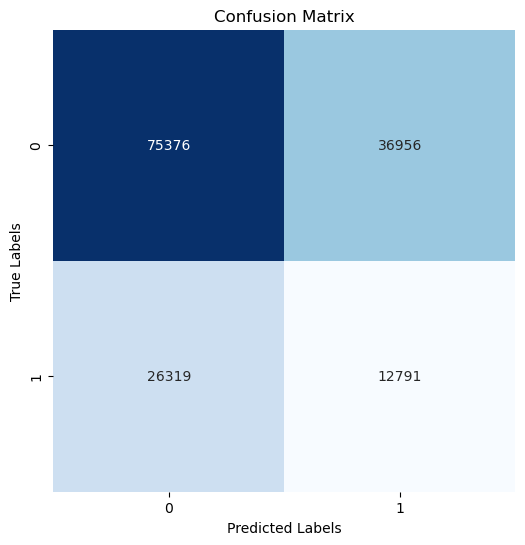

In [206]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True
            )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [208]:
### Applying ANN Method for prediction 

!pip install tensorflow
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [214]:
model = Sequential()
model

In [215]:
### Input Layer
model.add(Dense(64,activation="sigmoid",input_dim=5))

### Hidden Layer
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))

### Output Layer
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                384       
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [216]:
### Compiling the mode

model.compile(optimizer="adam",loss = "binary_crossentropy",metrics=["accuracy"])

In [217]:
history = model.fit(X_train, y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
4920/4920 [==============================] - 16s 3ms/step - loss: 0.2736 - accuracy: 0.8772 - val_loss: 0.2762 - val_accuracy: 0.8767
Epoch 2/100
4920/4920 [==============================] - 15s 3ms/step - loss: 0.2677 - accuracy: 0.8800 - val_loss: 0.2719 - val_accuracy: 0.8781
Epoch 3/100
4920/4920 [==============================] - 14s 3ms/step - loss: 0.2665 - accuracy: 0.8809 - val_loss: 0.2700 - val_accuracy: 0.8788
Epoch 4/100
4920/4920 [==============================] - 14s 3ms/step - loss: 0.2661 - accuracy: 0.8809 - val_loss: 0.2699 - val_accuracy: 0.8789
Epoch 5/100
4920/4920 [==============================] - 15s 3ms/step - loss: 0.2655 - accuracy: 0.8813 - val_loss: 0.2702 - val_accuracy: 0.8783
Epoch 6/100
4920/4920 [==============================] - 15s 3ms/step - loss: 0.2653 - accuracy: 0.8814 - val_loss: 0.2692 - val_accuracy: 0.8786
Epoch 7/100
4920/4920 [==============================] - 15s 3ms/step - loss: 0.2650 - accuracy: 0.8815 - val_loss: 0.2694 -

In [218]:
ANN_y_pred = model.predict(X_test_subset)

4733/4733 [==============================] - 7s 2ms/step


In [219]:
ANN_y_pred = ANN_y_pred.argmax(axis=-1)
ANN_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [220]:
ANN_accuracy = accuracy_score(y_val, ANN_y_pred)
print("Accuracy:", ANN_accuracy)

Accuracy: 0.7417493165700401


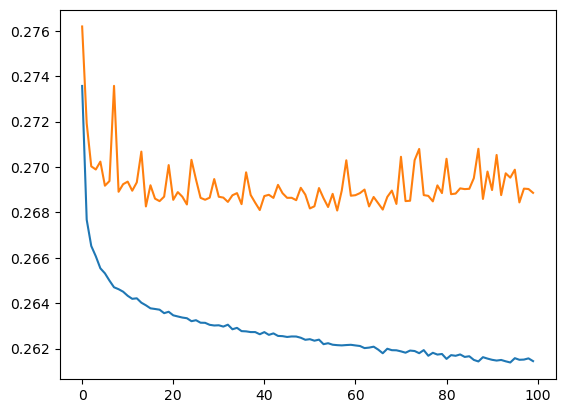

In [221]:
### Checking Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

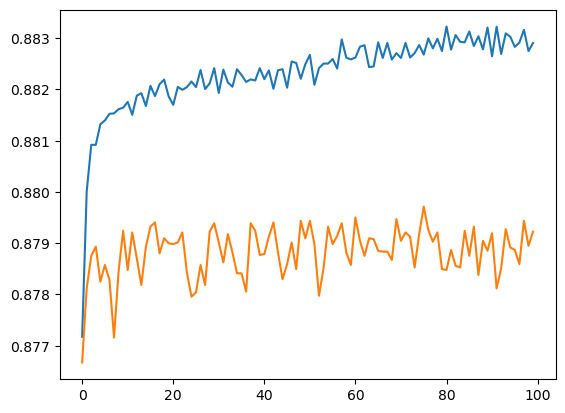

In [222]:
### Checking Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])